# 🧬 Leptospirosis Detection & Data Cleaning Impact
Welcome to this guided notebook that demonstrates how data cleaning and understanding can significantly improve machine learning model performance using a leptospirosis dataset from Sri Lanka.

## 1. Initial Data Exploration (EDA: Explorotary Data Analysis)

### 1.1 Read Dataset

In [516]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('lepto_data.csv')
df.head(20)

,Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2016,4,7,1,2,1,2,48,1,...,,,,,,,,,,2
1,2,2016,4,7,1,2,1,2,55,1,...,,,,,,,,,,1
2,3,2016,4,7,1,2,2,1,43,1,...,,,,,,,,,,2
3,4,2016,4,7,1,2,2,1,42,1,...,,,,,,,,,,1
4,5,2016,4,7,1,2,2,2,55,1,...,,,,,,,,,,1
5,6,2016,4,7,1,2,2,2,63,1,...,,,,,,,,,,2
6,7,2016,4,7,1,2,1,2,58,2,...,,,,,,,,,,1
7,8,2016,4,7,1,2,2,1,15,1,...,,,,,,,,,,2
8,9,2016,4,7,1,2,1,2,19,1,...,,,,,,,,,,1
9,10,2016,4,7,1,2,1,2,87,1,...,,,,,,,,,,2


### 1.2 Dataset Overview

In [517]:
# Dataset shape
print(f"Dataset shape: {df.shape}")

# Data types and non-null counts
df.info()

# Summary statistics (numerical columns)
display(df.describe().T)

Dataset shape: (1734, 806)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Columns: 806 entries, Serial to Final
dtypes: float64(153), int64(559), object(94)
memory usage: 10.7+ MB


,count,mean,std,min,25%,50%,75%,max
Serial,1734.0,867.500000,500.707000,1.0,434.25,867.5,1300.75,1734.0
Year,1734.0,2017.158593,0.786274,2016.0,2017.00,2017.0,2018.00,2019.0
Month,1734.0,7.633218,3.180357,1.0,6.00,8.0,10.00,12.0
Hospital,1734.0,6.084775,2.084280,1.0,5.00,7.0,7.00,8.0
Sample,1734.0,1.121684,0.327015,1.0,1.00,1.0,1.00,2.0
...,...,...,...,...,...,...,...,...
CultureqPCRDia,1734.0,79.335063,38.908761,1.0,99.00,99.0,99.00,99.0
SerumqPCRDiagnosis,1734.0,79.500577,38.648456,1.0,99.00,99.0,99.00,99.0
UFqPCRDiag,1734.0,88.188005,30.383495,1.0,99.00,99.0,99.00,99.0
Isolate,1734.0,31.992503,44.522710,1.0,2.00,2.0,98.00,98.0


📝 What this tells you: Dimensions, structure, column types, and summary statistics.

### 1.3 Missing Value Inspection

In [518]:
# Missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if not missing.empty:
    print("Columns with missing values:")
    display(missing)
else:
    print("✅ No missing values found.")

✅ No missing values found.


📝 Why: Knowing what needs imputation or dropping.

### 1.4 Categorical and Numerical Feature Breakdown

In [519]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (94): ['TertiaryEducation', 'wetsoilduration', 'Gardeningexposure', 'Stagnantwaterfrequency', 'Paddyfieldduration', 'Puscells', 'Redcells', 'PulseRhythem', 'Redcells2', 'Redcells3', 'Redcells4', 'Redcells5', 'Redcells6', 'Redcells7', 'Redcells8', 'Redcells9', 'Redcells10', 'MAT_set_1', 'Pomona', 'Bratislava', 'Canicola', 'Icterohaemorrhagiae', 'Mankarso', 'Georgia', 'Pyrogene', 'Bataviae', 'Wolfii', 'Geyaweera', 'Weerasinghe', 'Ceylonica', 'Alice', 'Patoc', 'Autumnalis', 'Alex', 'Ballum', 'Djasiman', 'Australis', 'Tarassovi', 'Ratnapura', 'Borincana', 'Celledoni', 'Grippotyphosa', 'PomonaF', 'BratislavaF', 'CanicolaF', 'IcterohaemorrhagiaeF', 'MankarsoF', 'GeorgiaF', 'PyrogeneF', 'BataviaeF', 'WolfiiF', 'GeyaweeraF', 'WeerasingheF', 'CeylonicaF', 'AliceF', 'PatocF', 'AutumnalisF', 'AlexF', 'BallumF', 'DjasimanF', 'AustralisF', 'TarassoviF', 'RatnapuraF', 'BorincanaF', 'CelledoniF', 'GrippotyphosaF', 'Acu_L.interrogansserovarBratislavastr.JezBratislava', 'Acu_L.inter

📝 Why: Helps plan encoding and scaling.

### 1.5 Unique Values in Categorical Columns

In [520]:
for col in cat_cols:
    print(f"\n{col} — Unique Values ({df[col].nunique()}):")
    print(df[col].value_counts(normalize=True).head())


TertiaryEducation — Unique Values (5):
TertiaryEducation
3     0.701845
      0.258939
1     0.020185
2     0.018454
99    0.000577
Name: proportion, dtype: float64

wetsoilduration — Unique Values (17):
wetsoilduration
99    0.536332
99    0.403691
1     0.019031
2     0.009804
3     0.006344
Name: proportion, dtype: float64

Gardeningexposure — Unique Values (7):
Gardeningexposure
99    0.386967
99    0.306805
2     0.156863
2     0.092849
1     0.046136
Name: proportion, dtype: float64

Stagnantwaterfrequency — Unique Values (12):
Stagnantwaterfrequency
99    0.558824
99    0.403691
7     0.012687
1     0.010957
2     0.004037
Name: proportion, dtype: float64

Paddyfieldduration — Unique Values (19):
Paddyfieldduration
99    0.530565
99    0.401961
2     0.010381
8     0.009227
1     0.009227
Name: proportion, dtype: float64

Puscells — Unique Values (7):
Puscells
99    0.812572
2     0.083622
1     0.059400
3     0.024798
0     0.012687
Name: proportion, dtype: float64

Redcells —

📝 Why: Identify rare values and encoding strategy.

### 1.6 Correlation Heatmap for Numerical Features

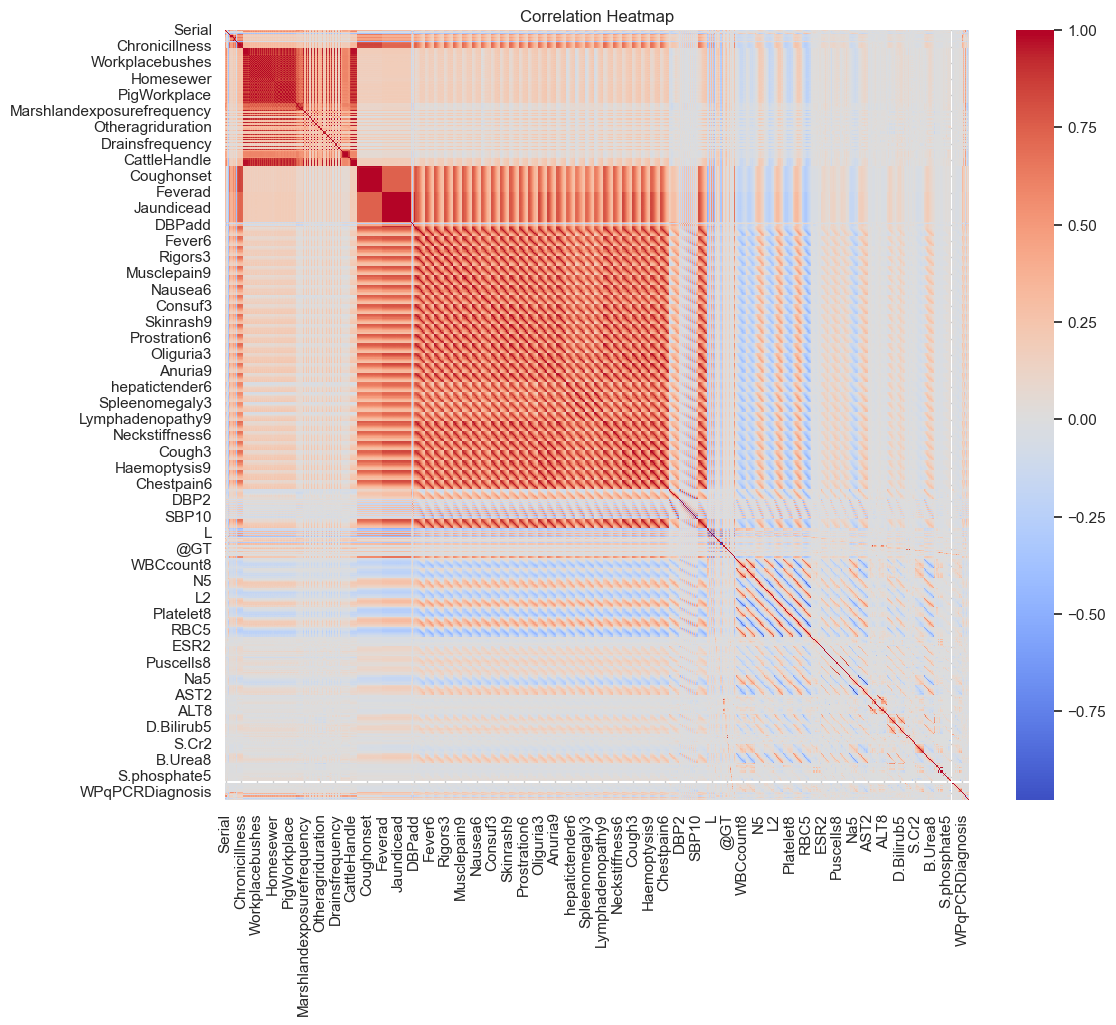

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

📝 Why: Spot relationships and multicollinearity.
#### 1.6 Class Distribution of Target Variable

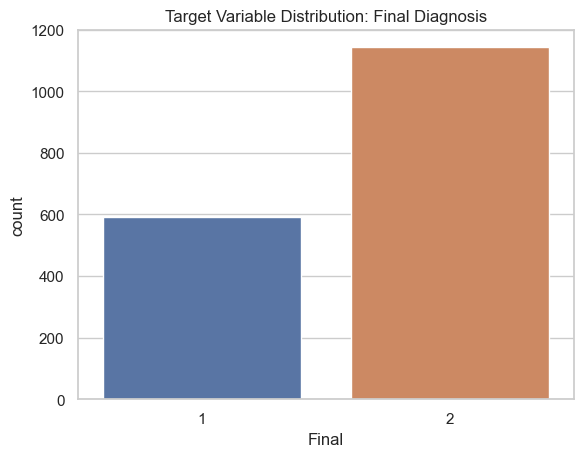

Final
2    65.92%
1    34.08%
Name: proportion, dtype: object

In [522]:
sns.countplot(x='Final', data=df)
plt.title('Target Variable Distribution: Final Diagnosis')
plt.show()

# Percentage distribution
display(df['Final'].value_counts(normalize=True).map('{:.2%}'.format))

📝 Why: Understand skewness, outliers, and transformations.

## 2. Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to the predictive models. It plays a critical role in improving model accuracy and performance.

#### Common Feature Engineering Techniques:

- **Handling Missing Values**  
  Replace or drop missing values using strategies like mean, median, mode, or more advanced imputation methods.

- **Encoding Categorical Variables**  
  Convert categories to numeric form using:
  - **Label Encoding** for ordinal features (e.g., `Low`, `Medium`, `High`)
  - **One-Hot Encoding** for nominal features (e.g., `City`, `Color`)

- **Scaling and Normalization**  
  Standardize numerical features using techniques like Min-Max scaling or Z-score normalization, especially for distance-based models (e.g., KNN, SVM).

- **Feature Creation**  
  Generate new features that might reveal hidden patterns (e.g., ratios, bins, interaction terms).

- **Feature Selection**  
  Identify the most informative features using statistical tests or model-based importance (e.g., Random Forest feature importance).

- **Handling Outliers**  
  Remove or cap extreme values to reduce their impact on the model.

---

### 2.1 Handling Missing Values

#### 2.1.1 Handle Placeholder Values (99 → NaN)

In [523]:
# Replace 99 with an empty string in the entire DataFrame
df.replace(99, '', inplace=True)

print("🔄 Replaced all 99 values with empty strings for better formatting.")

# Display the first rows of the modified DataFrame
df.head(20)

🔄 Replaced all 99 values with empty strings for better formatting.


,Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2016,4,7,1,2,1,2,48,1,...,,,,,,,,,,2
1,2,2016,4,7,1,2,1,2,55,1,...,,,,,,,,,,1
2,3,2016,4,7,1,2,2,1,43,1,...,,,,,,,,,,2
3,4,2016,4,7,1,2,2,1,42,1,...,,,,,,,,,,1
4,5,2016,4,7,1,2,2,2,55,1,...,,,,,,,,,,1
5,6,2016,4,7,1,2,2,2,63,1,...,,,,,,,,,,2
6,7,2016,4,7,1,2,1,2,58,2,...,,,,,,,,,,1
7,8,2016,4,7,1,2,2,1,15,1,...,,,,,,,,,,2
8,9,2016,4,7,1,2,1,2,19,1,...,,,,,,,,,,1
9,10,2016,4,7,1,2,1,2,87,1,...,,,,,,,,,,2


#### 2.1.2 Remove Missing Values

Step 1: Let's print the number of columns in the initial dataset.

In [524]:
print(f"🧮 Number of columns before cleaning: {df.shape[1]}")

🧮 Number of columns before cleaning: 806


Step 2: Treat empty strings as NaN

In [525]:
df_replaced = df.replace('', np.nan)

Step 3: Identify columns with >20% missing (NaN or empty string)

In [526]:
missing_ratio = df_replaced.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.20].index.tolist()

print("🗑️ Columns with > 20% missing values to be dropped:")
display(cols_to_drop)

🗑️ Columns with > 20% missing values to be dropped:


['Income',
 'Education',
 'Prophylactics',
 'Pasttreatments',
 'Pastantibiotics',
 'Chronicillness',
 'Possibleexposure',
 'Usualdrinkingwatersource',
 'Usualbathingwatersource',
 'Sourceofwaterforhousehold',
 'Garbagedisposalprocedure',
 'Accumilationofrefusal',
 'Availabilityofpublicgarbagecollectionprocedure',
 'HomeStreamrivercanaloranyotherrunningwatersource',
 'WorkplaceStreamrivercanaloranyotherrunningwatersource',
 'Homepondlaketankoranyotherstagnantwatersource',
 'WorkPlacepondlaketankoranyotherstagnantwatersource',
 'Homemarshywetland',
 'Workplacemarshywet',
 'HomeBushes',
 'Workplacebushes',
 'Homeforest',
 'Workplaceforest',
 'Homeworkingpaddyfield',
 'WorkPlaceworkingpaddyfield',
 'Homeabondantpaddyfield',
 'Workplaceabondantpaddyfield',
 'Homeotheragricultural',
 'workplaceotheragricultural',
 'Homeanimalfarm',
 'Workplaceanimalfarm',
 'Homegarbageaccumilation',
 'Workplacegarbageaccumilation',
 'Homeblockeddrainage',
 'Workplaceblockeddrainage',
 'Homesewer',
 'Workplac

Step 4: Drop identified columns

In [527]:
df_cleaned = df.drop(columns=cols_to_drop)

Step 5: Print column count after dropping

In [528]:
print(f"✅ Number of columns after dropping: {df_cleaned.shape[1]}")

✅ Number of columns after dropping: 100


Step 6: Let's check if there are any missing values remaining.

In [529]:
def check_missing_values(df):
    """
    Checks for missing values in the DataFrame and prints columns with missing counts.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    pd.Series: Series of columns with missing values and their counts.
    """
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    if missing.empty:
        print("✅ No missing values in the DataFrame.")
    else:
        print("⚠️ Columns with missing values:")
        display(missing)

    return missing

# Check for missing values in the cleaned DataFrame
check_missing_values(df_cleaned)

✅ No missing values in the DataFrame.


Series([], dtype: int64)

### 2.2 Handle Categorical Variables

Step 1: Write a function to identify categorical columns

In [530]:
def get_categorical_columns(df):
    """
    Identifies and prints categorical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    List[str]: A list of categorical column names.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if categorical_cols:
        print("🧾 Categorical columns detected:")
        for col in categorical_cols:
            print(f" - {col}")
    else:
        print("✅ No categorical columns found.")

    return categorical_cols

Step 2: Apply the function to get the categorical columns from the dataset

In [531]:
# Apply the function
categorical_columns = get_categorical_columns(df_cleaned)

🧾 Categorical columns detected:
 - Serial
 - ICU
 - OPD
 - Sex
 - Age
 - Ethnicity
 - TertiaryEducation
 - Puscells
 - Redcells
 - PulseRhythem
 - Redcells3
 - Redcells4
 - Redcells6
 - Redcells7
 - Redcells8
 - Redcells10
 - WPqPCRDiagnosis
 - MAT_set_1
 - Pomona
 - Bratislava
 - Canicola
 - Icterohaemorrhagiae
 - Mankarso
 - Georgia
 - Pyrogene
 - Bataviae
 - Wolfii
 - Geyaweera
 - Weerasinghe
 - Ceylonica
 - Alice
 - Patoc
 - Autumnalis
 - Alex
 - Ballum
 - Djasiman
 - Australis
 - Tarassovi
 - Ratnapura
 - Borincana
 - Celledoni
 - Grippotyphosa
 - PomonaF
 - BratislavaF
 - CanicolaF
 - IcterohaemorrhagiaeF
 - MankarsoF
 - GeorgiaF
 - PyrogeneF
 - BataviaeF
 - WolfiiF
 - GeyaweeraF
 - WeerasingheF
 - CeylonicaF
 - AliceF
 - PatocF
 - AutumnalisF
 - AlexF
 - BallumF
 - DjasimanF
 - AustralisF
 - TarassoviF
 - RatnapuraF
 - BorincanaF
 - CelledoniF
 - GrippotyphosaF
 - Acu_L.interrogansserovarBratislavastr.JezBratislava
 - Acu_L.interrogansserovarAutumnalisstr.AkiyamiA
 - Acu_L.weili

Step 3: Write a function which perform label encoding on the categorical columns we found

In [532]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode categorical columns
def label_encode_columns(df, categorical_cols):
    """
    Performs label encoding on given categorical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to transform.
    categorical_cols (List[str]): The list of categorical column names.

    Returns:
    pd.DataFrame: DataFrame with label-encoded categorical columns.
    """
    df_encoded = df.copy()
    le = LabelEncoder()

    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    print("✅ Label encoding completed for categorical columns.")
    return df_encoded

Step 4: Apply the function to Encode categorical variables or columns that we identified

In [533]:
# Encode categorical columns
df_encoded = label_encode_columns(df_cleaned, categorical_columns)

✅ Label encoding completed for categorical columns.


Step 5: Let's confirm there are no remaining categorical variables 

In [534]:
# Apply the function on df_encoded
categorical_columns = get_categorical_columns(df_encoded)

✅ No categorical columns found.


### 2.3 Remove Unncessasary Columns

Step 1: Remove the 'Serial' colum from the dataset

In [535]:
# Remove the 'Serial' column
df_encoded.drop(columns=['Serial'], inplace=True)
print("✅ 'Serial' column removed.")

✅ 'Serial' column removed.


Step 2: Print the dataset to verify if the 'Serial' column is gone

In [536]:
# Print the data frame
df_encoded.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,TertiaryEducation,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,2016,4,7,1,2,1,2,39,1,0,...,0,0,0,0,0,0,0,0,0,2
1,2016,4,7,1,2,1,2,47,1,3,...,0,0,0,0,0,0,0,0,0,1
2,2016,4,7,1,2,2,1,34,1,3,...,0,0,0,0,0,0,0,0,0,2
3,2016,4,7,1,2,2,1,33,1,3,...,0,0,0,0,0,0,0,0,0,1
4,2016,4,7,1,2,2,2,47,1,3,...,0,0,0,0,0,0,0,0,0,1


### 2.4 Handling Outliers in Numeric Columns Using Z-Score

Step 1: Define a function that identifies outliers in numerical columns

In [537]:
from scipy.stats import zscore

# Detect outliers using Z-score method
def detect_outliers_zscore(df, threshold=3):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number])

    # Compute Z-scores
    z_scores = numeric_cols.apply(zscore, nan_policy='omit')

    # Identify outlier positions
    outlier_indices = np.where(np.abs(z_scores) > threshold)

    # Pack outlier information
    outlier_info = list(zip(
        numeric_cols.columns[outlier_indices[1]],
        outlier_indices[0]
    ))

    # Deduplicate and sort
    outlier_info = sorted(set(outlier_info), key=lambda x: x[1])

    return outlier_info

Step 2: Define a function to print the outliers

In [538]:

# Print outliers
def print_outliers(df):
    """
    Prints outliers detected in the DataFrame.
    """
    outliers = detect_outliers_zscore(df)
    if outliers:
        print("Outliers detected at:")
        for col, row in outliers:
            print(f"Row {row}, Column '{col}'")
    else:
        print("✅ No outliers detected in numerical columns.")

Step 3: Identify and print outliers

In [539]:
# Print outliers
print_outliers(df_encoded)

Outliers detected at:
Row 4, Column 'Redcells3'
Row 8, Column 'Bratislava'
Row 12, Column 'BratislavaF'
Row 12, Column 'Wolfii'
Row 12, Column 'Icterohaemorrhagiae'
Row 12, Column 'Bataviae'
Row 12, Column 'Mankarso'
Row 12, Column 'Redcells4'
Row 12, Column 'Ceylonica'
Row 12, Column 'Bratislava'
Row 12, Column 'Georgia'
Row 16, Column 'CeylonicaF'
Row 16, Column 'Redcells6'
Row 31, Column 'Bratislava'
Row 33, Column 'Ethnicity'
Row 40, Column 'Weerasinghe'
Row 46, Column 'OPD'
Row 46, Column 'ICU'
Row 48, Column 'WolfiiF'
Row 48, Column 'AustralisF'
Row 48, Column 'WeerasingheF'
Row 48, Column 'BataviaeF'
Row 55, Column 'ICU'
Row 55, Column 'OPD'
Row 55, Column 'Weerasinghe'
Row 56, Column 'AustralisF'
Row 56, Column 'WeerasingheF'
Row 56, Column 'DjasimanF'
Row 56, Column 'AutumnalisF'
Row 56, Column 'CelledoniF'
Row 56, Column 'Australis'
Row 56, Column 'GeorgiaF'
Row 56, Column 'CanicolaF'
Row 56, Column 'GrippotyphosaF'
Row 56, Column 'Djasiman'
Row 62, Column 'Redcells3'
Row 72,

Step 4: Write a function to remove outliers

In [540]:
def remove_outliers_zscore(df, threshold=3):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number])

    # Compute Z-scores
    z_scores = numeric_cols.apply(zscore, nan_policy='omit')

    # Mask rows where any Z-score is above the threshold
    outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

    # Count how many outliers will be removed
    num_outliers = outlier_mask.sum()

    # Remove those rows
    df_cleaned = df[~outlier_mask].reset_index(drop=True)

    print(f"✅ Removed {num_outliers} rows with outliers.")
    return df_cleaned

Step 5: Remove the outliers using about function

In [541]:
# Apply the function to remove outliers
df_no_outliers = remove_outliers_zscore(df_encoded)

✅ Removed 667 rows with outliers.


### 2.5 Feature Selection

Step 1: Write a function that identifies significan features using a Random Forest Classifier

In [542]:
from sklearn.ensemble import RandomForestClassifier

def identify_significant_features(df, target_column="Final", top_n=15):
    from tabulate import tabulate

    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Train Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    # Extract importance
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })

    top_features = feature_importance.sort_values(by="Importance", ascending=False).head(top_n)
    return top_features

Step 2: Apply the function to get the significan features

In [543]:
top_features = identify_significant_features(df_no_outliers, target_column="Final", top_n=15)

Step 3: Write a function to plot the significant features

In [544]:
import matplotlib.pyplot as plt

def plot_top_features(top_features):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_features,
        x="Importance",
        y="Feature",
        palette="viridis"
    )
    plt.title("Top Important Features Based on Random Forest", fontsize=14)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

Step 4: Plot the significant variables

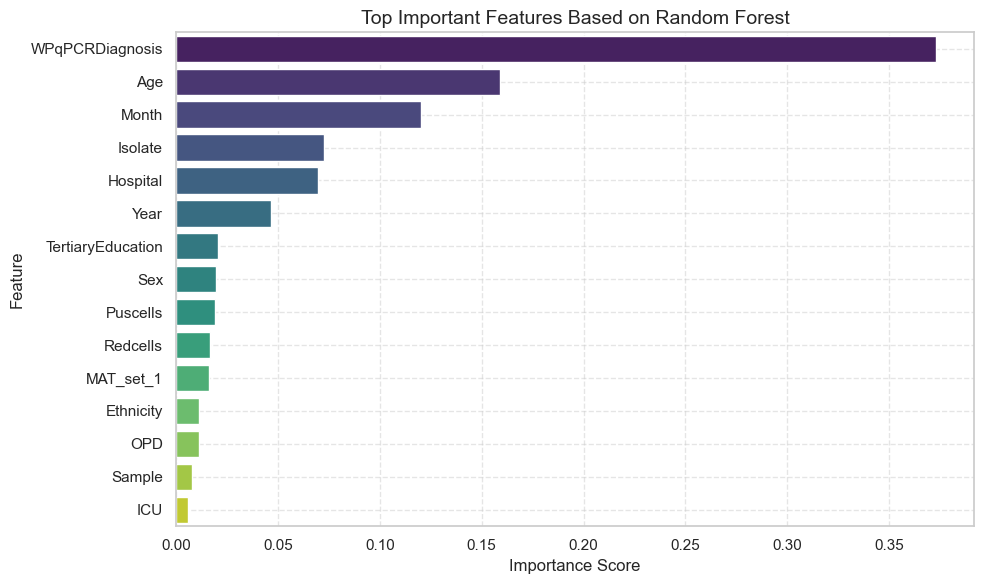

In [545]:
plot_top_features(top_features)

## 3. Model Training and Evaluation

Step 1: Define a function to split the dataset by train and test sets


In [546]:
from sklearn.model_selection import train_test_split

def split_dataframe(df, target_column, test_size=0.3, random_state=42):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data with stratification and fixed seed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    return X_train, X_test, y_train, y_test

Step 2: Split the data frame into train set and test set

In [547]:
X_train, X_test, y_train, y_test = split_dataframe(df_no_outliers, target_column='Final')

Step 3: Write a function to evaluate a model and store its metrics

In [548]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred) * 100,
        'Precision': precision_score(y_test, y_pred, average='binary') * 100,
        'Recall': recall_score(y_test, y_pred, average='binary') * 100,
        'F1 Score': f1_score(y_test, y_pred, average='binary') * 100
    }
    return metrics

Step 4: Train a Random Forest Classider model and evaluate it

In [549]:
from sklearn.ensemble import RandomForestClassifier

results = {}

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
results['Random Forest'] = evaluate_model_metrics(rf_model, X_test, y_test)

Step 5: Print the evalation metrics

In [550]:
# Print evaluation metrics for Random Forest
print("📊 Evaluation Metrics for Random Forest:\n")
for metric, value in results['Random Forest'].items():
    print(f"{metric}: {value:.2f}%")

📊 Evaluation Metrics for Random Forest:

Accuracy: 92.21%
Precision: 89.19%
Recall: 79.52%
F1 Score: 84.08%


### Model Evaluation Metrics Explained

Understanding how to evaluate a classification model is critical for interpreting its performance. Below are the key metrics used:

---

#### **1. Accuracy**
- **Definition**: The proportion of total predictions the model got correct.
- **When to Use**: Most useful when the classes are balanced.

---

#### **2. Precision**
- **Definition**: Of all instances predicted as *positive*, how many were actually *positive*.
- **When to Use**: Important when the cost of false positives is high (e.g., misdiagnosing someone as sick when they’re healthy).

---

#### **3. Recall (Sensitivity or True Positive Rate)**
- **Definition**: Of all actual *positive* cases, how many did the model correctly identify.
- **When to Use**: Important when the cost of false negatives is high (e.g., failing to detect a disease).

---

#### **4. F1 Score**
- **Definition**: The harmonic mean of Precision and Recall, offering a balance between the two.
- **When to Use**: Best when classes are imbalanced and you need to balance precision and recall.

---

## 4. Improving The Model

### 4.1 Handle Highly Correlated Features

Highly correlated features (multicollinearity) can cause overfitting or redundancy. Here’s how we can detect and remove them.

Step 1: Calculate the correlation matrix

In [551]:
corr_matrix = df_no_outliers.drop(columns=['Final']).corr().abs()

Step 2: Select upper triangle of correlation matrix

In [552]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

Step 3: Find features with correlation greater than 0.9

In [553]:
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

Step 4: Print highly correlated features

In [554]:
display("Highly correlated features to remove:", high_corr_features)

'Highly correlated features to remove:'

['Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
 'Acu_L.weiliiserovarCelledonistr.Celledoni',
 'Acu_L.interrogansserovarCanicolastr.Ruebush',
 'Acu_L.interrogansserovarIcterohaemorrhagiaestr.RGA',
 'Acu_L.interrogansserovarMankarsostr.Mankarso',
 'Acu_L.santarosaiserovarGeorgiastr.LT117',
 'Acu_L.santarosaiserovarPyrogenesstr.Salinem',
 'Acu_L.interrogansserovarBataviaestr.VanTienan',
 'Acu_L.interrogansserovarAlexistr.616',
 'Acu_L.interrogansserovarAustralisstr.Ballico',
 'Acu_L.interrogansserovarwolfiistr.3705',
 'Acu_L.interrogansserovarWeerasinghe',
 'Acu_Patoc']

Step 5: Remove those Highly correlated features

In [555]:
df_reduced = df_no_outliers.drop(columns=high_corr_features)

Step 6: Re-split the dataset into training set and testing set

In [556]:
X_train, X_test, y_train, y_test = split_dataframe(df_reduced, target_column='Final')

Step 7: Retrain the model and evaluate

In [557]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
results['Random Forest'] = evaluate_model_metrics(rf_model, X_test, y_test)

Step 8: Print the evaluation metrics

In [558]:
# Print evaluation metrics for Random Forest
print("📊 Evaluation Metrics for Random Forest:\n")
for metric, value in results['Random Forest'].items():
    print(f"{metric}: {value:.2f}%")

📊 Evaluation Metrics for Random Forest:

Accuracy: 92.21%
Precision: 91.43%
Recall: 77.11%
F1 Score: 83.66%


### 4.2 Try Different Models

Step 1: Train and evaluate Random Forest Classifier

In [559]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
results['Random Forest'] = evaluate_model_metrics(rf_model, X_test, y_test)

Step 2: Train and evaluate Gradient Boosting Classifier

In [560]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and evaluate Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
results['Gradient Boosting'] = evaluate_model_metrics(gb_model, X_test, y_test)

Step 3: Train and evaluate Logistic Regression Classifier

In [561]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
results['Logistic Regression'] = evaluate_model_metrics(lr_model, X_test, y_test)

Step 4: Train and evaluate Support Vector Machine Classifier

In [562]:
from sklearn.svm import SVC

# Train and evaluate SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
results['SVM'] = evaluate_model_metrics(svm_model, X_test, y_test)

Step 5: Train and evaluate K-Nearest Neighbors Classifier

In [563]:
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
results['KNN'] = evaluate_model_metrics(knn_model, X_test, y_test)

Step 6: Train and evaluate Naive Bayes Classifier

In [564]:
from sklearn.naive_bayes import GaussianNB

# Train and evaluate Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
results['Naive Bayes'] = evaluate_model_metrics(nb_model, X_test, y_test)

Step 7: Plot results of each classifier we trained

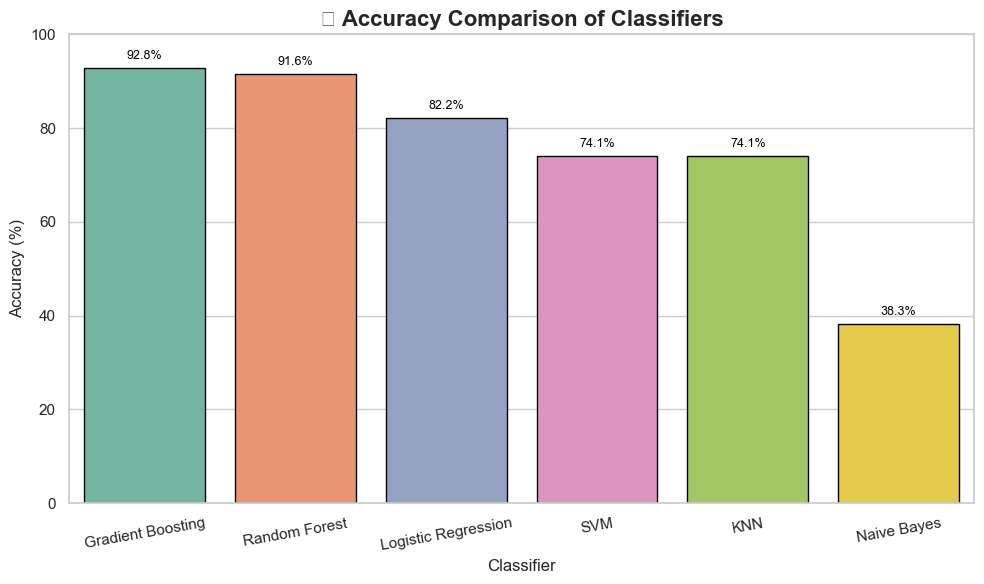

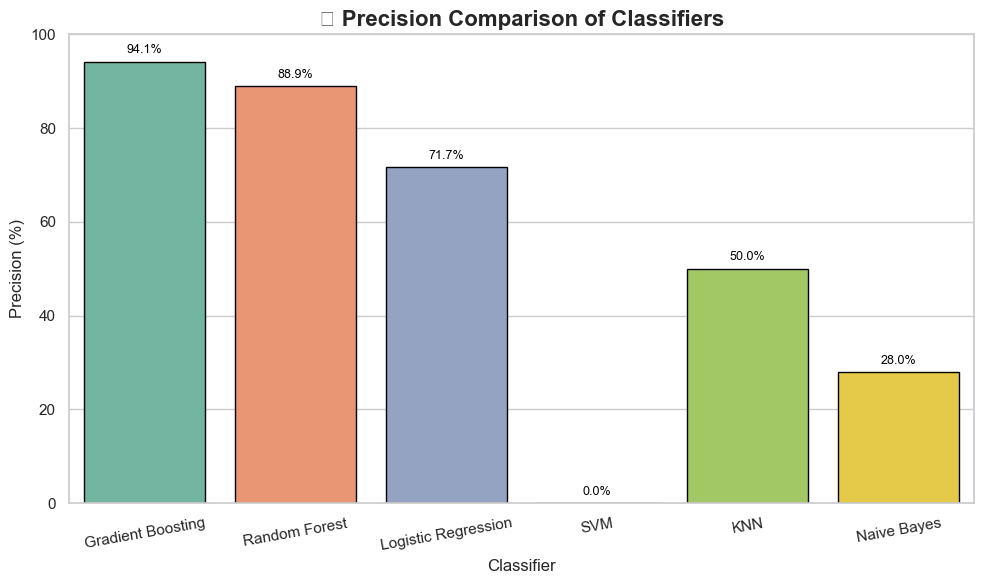

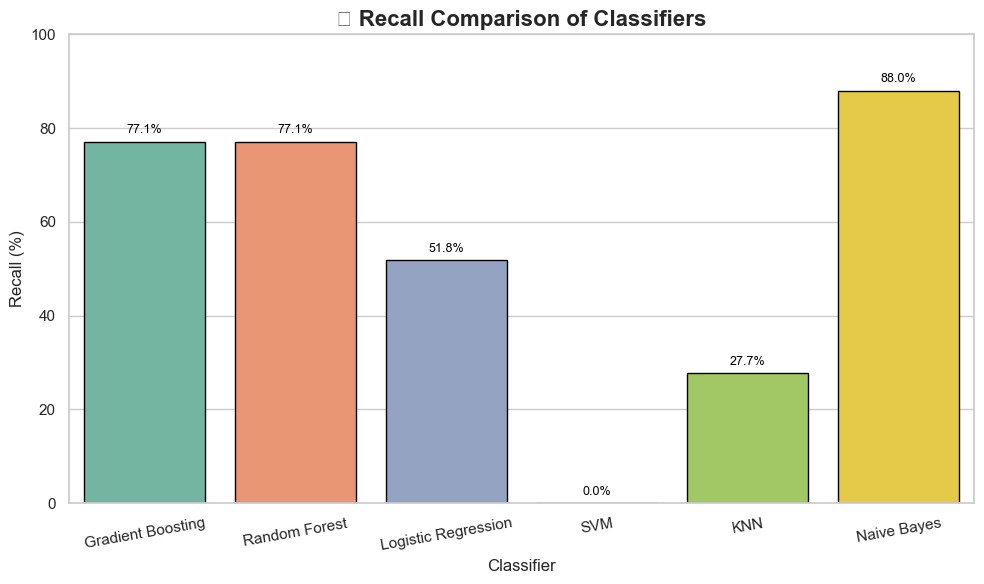

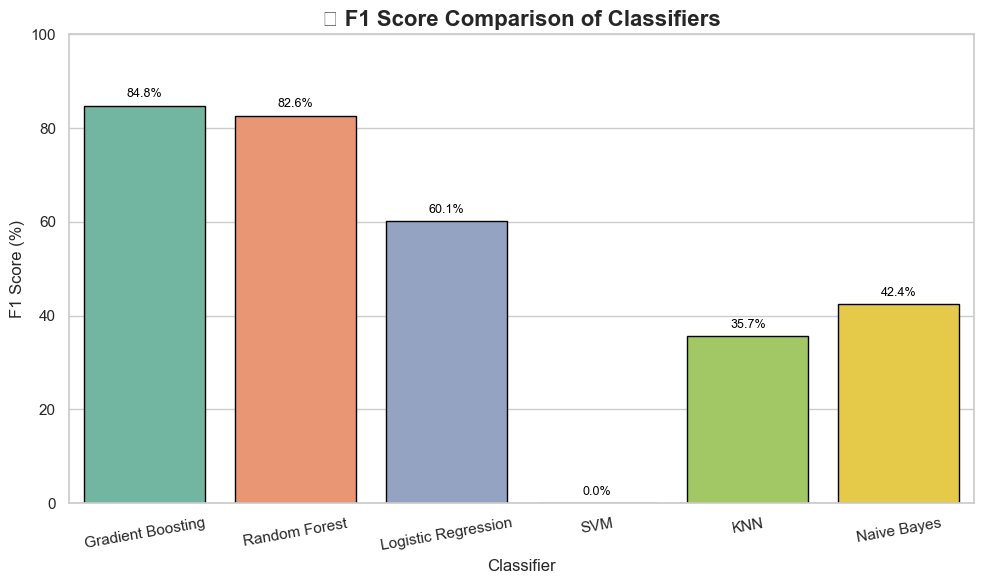

In [565]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Sort by Accuracy
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Set theme
sns.set_theme(style="whitegrid", context="notebook")

# Define metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create one plot per metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(
        data=results_df,
        x='Model',
        y=metric,
        palette='Set2',
        edgecolor='black'
    )

    # Annotate bars
    for p in barplot.patches:
        value = p.get_height()
        if not pd.isna(value):
            barplot.annotate(f'{value:.1f}%',
                             (p.get_x() + p.get_width() / 2., value),
                             ha='center', va='bottom',
                             fontsize=9, color='black', xytext=(0, 4),
                             textcoords='offset points')

    plt.title(f'📊 {metric} Comparison of Classifiers', fontsize=16, weight='bold')
    plt.ylabel(f'{metric} (%)', fontsize=12)
    plt.xlabel('Classifier', fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(rotation=10)
    plt.tight_layout()
    plt.show()